# Machine Learning: Training and evaluating a Regression model: An example
---
## Contents
1. Introduction
2. Setup
   1. Import required Python modules
   2. Load the dataset into a Pandas dataframe
3. Explore the dataset
4. Prepare the dataset
   1. Separte the dataset into `X` and `y` sets
   2. Apply required data engineering (one-hot encoding)
   3. Split the data in training and test datasets
5. Train the `linear regression` model
6. Evaluate the model
7. Assignment
---
## Introduction
This notebook provides a an example of training and evaluating a Regression model

This dataset has data collected from New York, California and Florida about 50 business Startups "17 in each state". The variables used in the dataset are Profit, R&D spending, Administration Spending, and Marketing Spending. 

This is a publicly available dataset from Kaggle: https://www.kaggle.com/datasets/farhanmd29/50-startups

Our ML training objective is to predict the amount of profit (this is the dependent, 'y' variable), based on the independent variables (X), R&D spending, Administration Spending, Marketing Spending and the location (state) of the business.


---
## Setup
Import the Python modules that we need for the model training and evaluation process.

The following set is also fairly typical for scikit-learn statistical model training

In [45]:
%pip install seaborn

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_absolute_error,root_mean_squared_error, r2_score

Note: you may need to restart the kernel to use updated packages.


Load the dataset that we are going to use for training, testing. 

This dataset noted above (from Kaggle), with information about 50 startups, has been downloaded to a local directory, `data` in this case.

The next step is read the CSV file into a Pandas dataframe so that we can easily explore the content of the dataset and get the dataset ready for model training.

The dataframe `head` function displays the first few rows of the dataframe

In [7]:
startups_df = pd.read_csv('data/50_Startups.csv')
startups_df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


---
## Explore the dataset 


Print a concise summary of a DataFrame.
The `info` method prints information about a DataFrame including the index dtype and columns, non-null values and memory usage.

In [8]:
startups_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


Take a look a the statistics of the numerical fields

In [9]:
startups_df.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


Take a look at the shape of the dataset (rows, columns)

In [10]:
startups_df.shape

(50, 5)

---
## Prepare the dataset for training

1. Separate the data in the `independent variables`, aka `X`, aka the `observations`, and the `dependent variable`, aka `y`, aka the target `label`
2. Apply `feature engineering`. In this example, this is limited to `one-hot encoding` to the State variable.
3. Check the `cross-correlation` of the `independent variables`
4. Split the data into `training` and `test` datasets


In [11]:
X = startups_df.iloc[:, :-1]    # All but the last column are the observations (aka independent varibles)
y = startups_df.iloc[:, -1]     # The last column is the dependent variable, that we want to predict
X.head()

,R&D Spend,Administration,Marketing Spend,State
0,165349.20,136897.80,471784.10,New York
1,162597.70,151377.59,443898.53,California
2,153441.51,101145.55,407934.54,Florida
3,144372.41,118671.85,383199.62,New York
4,142107.34,91391.77,366168.42,Florida


Categorical data can not be used directly for regression and needs to be transformed into numeric data. The solution is to use dummy variables. We create dummy variables for regression analysis that take on one of two values: zero or one.

In [12]:
# create an instance of one-hot-encoder
enc = OneHotEncoder()

enc_df = pd.DataFrame(enc.fit_transform(X[['State']]).toarray())
enc_df.columns = ['California', 'Florida', 'New York']
# merge with main df on key values
X = X.join(enc_df)
X.head()

,R&D Spend,Administration,Marketing Spend,State,California,Florida,New York
0,165349.20,136897.80,471784.10,New York,0.0,0.0,1.0
1,162597.70,151377.59,443898.53,California,1.0,0.0,0.0
2,153441.51,101145.55,407934.54,Florida,0.0,1.0,0.0
3,144372.41,118671.85,383199.62,New York,0.0,0.0,1.0
4,142107.34,91391.77,366168.42,Florida,0.0,1.0,0.0


At this point we drop the State variable from X. Variable of this datatype (string) cannot be in the dataset when it is given to the ML algorithm 

In [13]:
X = X.drop('State', axis=1)
X.head()

,R&D Spend,Administration,Marketing Spend,California,Florida,New York
0,165349.20,136897.80,471784.10,0.0,0.0,1.0
1,162597.70,151377.59,443898.53,1.0,0.0,0.0
2,153441.51,101145.55,407934.54,0.0,1.0,0.0
3,144372.41,118671.85,383199.62,0.0,0.0,1.0
4,142107.34,91391.77,366168.42,0.0,1.0,0.0


For many ML algorithms there is a requirement the independent variables are independent. That they are not dependent on each other. 
This can be explored by looking at the cross-correlation of the variables. 
It is expected that there will be moderate correlation of the one-hot-encoded variables, as these have identical values and are mutually exclusive. 
This is not an issue that we are concerned about for this example.
The following shows the correlations metrics as a table and as a heatmap.
The metrics show a high correlation between R&D Spend and Marketing Spend, however, we may reasonably assume that these two are not dependent on each other.

In [14]:
X.corr()

,R&D Spend,Administration,Marketing Spend,California,Florida,New York
R&D Spend,1.000000,0.241955,0.724248,-0.143165,0.105711,0.039068
Administration,0.241955,1.000000,-0.032154,-0.015478,0.010493,0.005145
Marketing Spend,0.724248,-0.032154,1.000000,-0.168875,0.205685,-0.033670
California,-0.143165,-0.015478,-0.168875,1.000000,-0.492366,-0.515152
Florida,0.105711,0.010493,0.205685,-0.492366,1.000000,-0.492366
New York,0.039068,0.005145,-0.033670,-0.515152,-0.492366,1.000000


<Axes: >

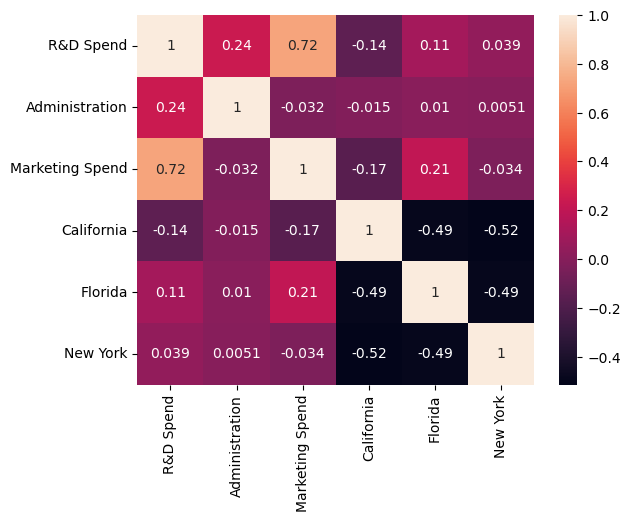

In [15]:
sns.heatmap(X.corr(), annot=True)

In [16]:
# SPLITTING DATA FOR train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

---
## Train the model

1. Instantiate the model (in this case we'lll use Linear Regression)
2. Train the model, using the `fit` method

In [113]:
# FITTING THE MODEL/TRAIN
linear_regressor = LinearRegression() # Instatiate the LinearRrgression model
linear_regressor.fit(X_train, y_train) # fit the model

LinearRegression()

---
## Evaluate the model

1. Run inference on the test data set and get the predictions
2. Compare the predictions to the target values for the test dataset

In [114]:
# Run the predictions
linear_y_pred = linear_regressor.predict(X_test)

In [115]:
# Assess the model with the R^2 metric
linear_score = r2_score(y_test, linear_y_pred)
print(f'R2 Model Score: {linear_score:0.4}')

R2 Model Score: 0.8987


In [92]:
# Assess the model with the Root Mean Squared Error Model Error metric
linear_score = root_mean_squared_error(y_test, linear_y_pred)
print(f'Root Mean Squared Error Model Score: {linear_score:0.6}')

Root Mean Squared Error Model Score: 9055.96


In [93]:
# Assess the model with the Mean Absolute Error metric
linear_score = mean_absolute_error(y_test, linear_y_pred)
print(f'Mean Absolute Error Model Score: : {linear_score:0.6}')

Mean Absolute Error Model Score: : 6961.48


Compare the actual values and predicted values

In [94]:
# Calcluate the residuals
linear_residuals = y_test - linear_y_pred
print('Residuals: ', linear_residuals)

Residuals:  13     7944.470917
39    -3602.693836
30      260.095749
45    18568.619314
17    -3380.112885
48   -15239.007419
26    -4007.810327
25     6761.097184
32     -171.435746
19     9679.434756
Name: Profit, dtype: float64


Text(0, 0.5, 'Predictions')

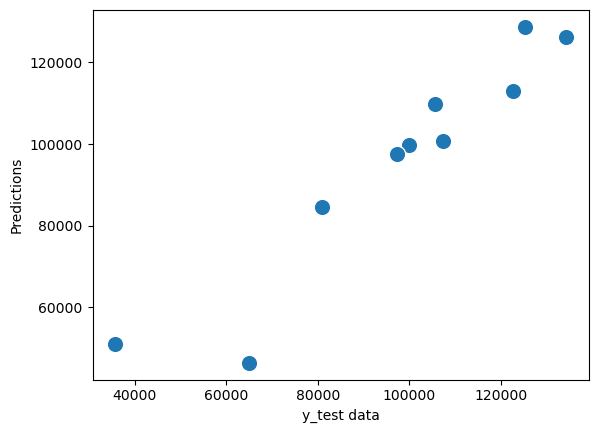

In [95]:
# Visualize the residuals (the differences between the labels and predicted values)
sns.scatterplot(x=y_test, y = linear_y_pred,s=140)
plt.xlabel('y_test data')
plt.ylabel('Predictions')

---
# Assignment

## Assignment Questions
Please submit the completed notebook with your answers for your assignment.

### Question 1

Changing the model algorithm from Linear Regression to an alternative (e.g., Ridge Regression, Random Forest Regression, Neural Network Regresssion) may improve ML performance. 

*Answer in the cell below:* True/False? If true, in 3 or so sentences say why this may be the case.

Answer: Usually True, but it depends. Generally choosing a model based on the relationship between the inputs and output expected will help better train the model. If the model has high accuracy or the data set is small, changing the regression algorithm may not help in improving the performance of the model.

### Question 2

Increasing the amount of training data (either by having more rows or more columns) may improve ML performance. 

*Answer in the cell below*: True/False? If true, in 3 or so sentences say why this may be the case.

Answer: Usually True, Increasing the training data set in rows will always help improve the performance of the ML model. Adding more columns, as long the there is a direct or indirect relationship between the output and the added column will improve the ML performance.

### Question 3

Automated Hyperparameter Optimization (HPO) can help with finding the best training hyperparameters for most algorithms.

*Answer in the cell below*: True/False? If true, in 3 or so sentences say why this may be the case.

Answer: True, HPO can help improve model performance by finding best combination of hyperparameters, which directly affects how the model learns for the given data.

### Question 4

Almost no feature engineering was carried out on the dataset in this notebook. By carrying out more feature engineering we may be able to get better results. 

*Answer in the cell below*: Can you suggest one or two fields/attributes/columns that we might apply feature engineering on, and how the data in the field might be transformed.

Answer: We can encode the state column. This would convert it into a numerical feature that can be used by the regression model more effectively.


## One Step Further ... (purely optional)

For those of you who have the time and motivation to learn more ...

- Try implementing you ideas with respect to questions 1 and/or 4 and see the impact on the models performance
- Add your code in the cells below


##### Using Ridge Regression, Scaling to improve the accuracy and HPO with Bayesian Optimization. The following code also uses One-Hot Encoding for feature engineering on State column

In [129]:
!pip install scikit-optimize

In [143]:
# Import necessary libraries
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from skopt import BayesSearchCV
from sklearn.model_selection import GridSearchCV

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

# Load the dataset
dataset = pd.read_csv('data/50_Startups.csv')  # Example dataset

# Separate independent (X) and dependent (y) variables
X = dataset.drop('Profit', axis=1)  # Features
y = dataset['Profit']               # Target variable

# Apply One-Hot Encoding to the 'State' column
encoder = OneHotEncoder(drop='first', sparse_output=False)  # Drop one column to avoid multicollinearity
state_encoded = encoder.fit_transform(X[['State']])

# Create a DataFrame for encoded state columns
state_encoded_df = pd.DataFrame(state_encoded, columns=encoder.get_feature_names_out(['State']))

# Combine the encoded columns with the rest of X
X = pd.concat([X.drop('State', axis=1), state_encoded_df], axis=1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()

# Fit the scaler on X_train and transform it
X_train_scaled = scaler.fit_transform(X_train)

# Transform X_test using the same scaler (do NOT fit again)
X_test_scaled = scaler.transform(X_test)


# Define the hyperparameter space for Ridge Regression
param_space = {
    'alpha': (0.1, 100.0, 'log-uniform')  # Log-uniform search for regularization parameter
}

# Instantiate the Ridge Regression model
ridge_model = Ridge()

# Set up Bayesian Optimization
bayes_search = BayesSearchCV(
    estimator=ridge_model,
    search_spaces=param_space,
    n_iter=30,  # Number of parameter evaluations
    cv=5,  # 5-fold cross-validation
    scoring='r2',  # Use R² as the evaluation metric
    random_state=42,
    n_jobs=-1
)

# Fit the model
bayes_search.fit(X_train_scaled, y_train)

# Best parameters and score
print("Best Hyperparameters:", bayes_search.best_params_)
print("Best R² Score (Train CV):", bayes_search.best_score_)

# Evaluate on the test set
best_ridge = bayes_search.best_estimator_
ridge_y_pred = best_ridge.predict(X_test_scaled)


Best Hyperparameters: OrderedDict([('alpha', 0.28163732179121714)])
Best R² Score (Train CV): 0.9290626929598311


In [144]:
# Assess the model with the R^2 metric
ridge_score = r2_score(y_test, ridge_y_pred)
print(f'R2 Model Score: {ridge_score:0.4}')

R2 Model Score: 0.8981


In [145]:
# Assess the model with the Root Mean Squared Error Model Error metric
score = root_mean_squared_error(y_test, ridge_y_pred)
print(f'Root Mean Squared Error Model Score: {score:0.6}')

Root Mean Squared Error Model Score: 9084.34


In [146]:
# Assess the model with the Mean Absolute Error metric
score = mean_absolute_error(y_test, ridge_y_pred)
print(f'Mean Absolute Error Model Score: : {score:0.6}')

Mean Absolute Error Model Score: : 7076.86


In [147]:
# Calcluate the residuals
residuals = y_test - ridge_y_pred
print('Residuals: ', residuals)

Residuals:  13     7967.034592
39    -3671.586390
30      750.369123
45    18434.887254
17    -3540.486279
48   -14944.812959
26    -3683.897698
25     6869.051665
32      365.172825
19    10541.272564
Name: Profit, dtype: float64


Text(0, 0.5, 'Predictions')

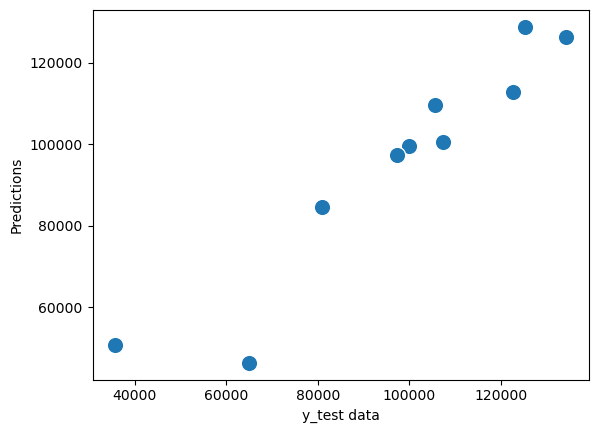

In [148]:
# Visualize the residuals (the differences between the labels and predicted values)
sns.scatterplot(x=y_test, y = y_pred,s=140)
plt.xlabel('y_test data')
plt.ylabel('Predictions')